In [ ]:
# Projeto Visão computacional - reconhecimento da íris 
# objetivo:
# 1. Criar um modelo de treinamento usando a base de dados fornecida - melhorar a qualidade das imagens
# 2. obter a matriz de confusão do modelo 
# 3. analisar os resultados

In [ ]:
!git clone https://github.com/lucianosilva-github/G6_iris_recognition.git

In [ ]:
# clone do repositorio em que estao as imagens originais - sem nenhum tipo de tratamento 
!git clone https://github.com/lucianosilva-github/images.git

In [ ]:
# images_train -> pasta com poucas imagens. Apenas utilizadas pra treinamento inicial do programa 
# imagens_train_processadas -> pasta com imagens processadas 

In [1]:
import cv2
import cv2 as cv
import os
from os import walk
import numpy as np
from matplotlib import pyplot as plt
import pywt

In [2]:
# Various recommendations exist for starting values of these parameters,
# and the meaning may differ between implementations. 
# Generally a radius of 0.5 to 2 pixels and an amount of 50–150% is recommended.

# fonte: https://en.wikipedia.org/wiki/Unsharp_masking#Digital_unsharp_masking
def sharpen_image(img, kernel_size=(5, 5), sigma=1.5, amount=2.0, threshold=0):
    blurred = cv2.GaussianBlur(img, kernel_size, sigma)

    # formula para melhorar a nitidez da imagem 
    sharpened = float(amount + 1) * img - float(amount) * blurred

    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)

    if threshold > 0:
        low_contrast_mask = np.absolute(img - blurred) < threshold
        np.copyto(sharpened, img, where=low_contrast_mask)

    return sharpened

In [3]:
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

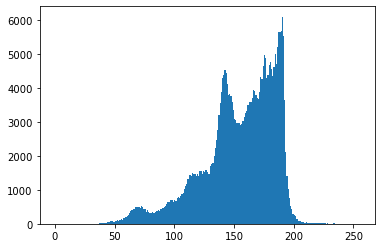

In [61]:
# plotar o histograma da imagem
image = cv2.imread('images/0000/0000_008.bmp')
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.hist(img.ravel(),bins=255,range=[0,255]) # da pra ver melhor os dois picos b-> range=[100,225]
plt.show()

In [82]:
clahe = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(8,8))
cl_img = clahe.apply(img)

ret, thresh3 = cv2.threshold(cl_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(ret)
# print(thresh3resh3)

cv2.imshow('image', cl_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

142.0


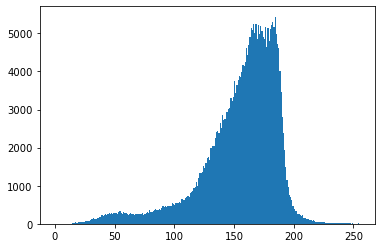

In [59]:
plt.hist(cl_img.ravel(),bins=255,range=[0,255]) # da pra ver melhor os dois picos -> range=[100,225]
plt.show()

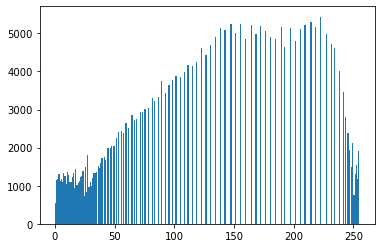

In [69]:
# equalizacao da clahe
img_equ = cv2.equalizeHist(cl_img)

plt.hist(img_equ.ravel(),bins=255,range=[0,255]) # da pra ver melhor os dois picos b-> range=[100,225]
plt.show()


In [88]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

img_s = cv2.filter2D(cl_img, -1, kernel)

T, img_bin = cv.threshold(img_s.astype('uint8'),127,255,cv.THRESH_BINARY)
# T , img_bin = cv.threshold(img_s.astype('uint8'),0,255,cv.THRESH_BINARY)
img_bin = cv.GaussianBlur(img_bin,(11,11),50)
new_img = img_s.copy()
rows, cols = new_img.shape

for l in range(rows):
    for c in range(cols):
        if img_bin[l][c] > T:
            new_img[l][c] = 255
            
            
cv2.imshow('image', new_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

img_bin = cv.GaussianBlur(thresh3,(11,11),50)
img_s = cv2.filter2D(img_bin, -1, kernel)

cv2.imshow('image', imgt)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
T, imgt = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# cortar a imagem em 512 x 512 
# img = img[100:376, 70:366] # region of interest

img_equ = cv2.equalizeHist(img)

img_s = sharpen_image(img, threshold=T)

T , img_bin = cv.threshold(img_s.astype('uint8'),0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
img_bin = cv.GaussianBlur(img_bin,(11,11),50)
new_img = img_s.copy()
rows, cols = new_img.shape

for l in range(rows):
    for c in range(cols):
        if img_bin[l][c] > T:
            new_img[l][c] = 255
            
# ajuste do brilho e do contraste
out = apply_brightness_contrast(new_img, 40, 30)
edges = cv.Canny(out, 100, 200)

# res = np.hstack((edges, out))

# print das imagens. Comparacao da saida com a atual
cv2.imshow('image', imgt)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [102]:
def percorre_pastas(num_pasta):
    for (dirpath, dirnames, filenames) in walk("images/00{}".format(num_pasta)):
        for e in filenames:
            image = cv.imread("images/00{0}/{1}".format(num_pasta, e))
            img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # qual a magia que essa funcao faz?
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            cl_img = clahe.apply(img)

            directory ="images_train_processadas/00{}/".format(num_pasta)

            if not os.path.exists(directory):
                os.makedirs(directory)

            filename = "images_train_processadas/00{0}/{1}".format(num_pasta, e)
            
            cv.imwrite(filename, cl_img)

In [103]:
# processamento para varias imagens
for i in range(0, 60):
    if i < 10:
        n ="0{}".format(i)
        percorre_pastas(n)
    else :
        percorre_pastas(i)
       

In [108]:
print('samuel' == 'samuel')

True


In [96]:
# inicio do teste
import G6_iris_recognition

G6_iris_recognition.iris_model_train("./images_train_processadas","model.pickle")

directory_list ['./images_train_processadas\\0000', './images_train_processadas\\0001']
name 0000
path_to_image ./images_train_processadas\0000\0000_000.bmp
path_to_image ./images_train_processadas\0000\0000_001.bmp
path_to_image ./images_train_processadas\0000\0000_002.bmp
path_to_image ./images_train_processadas\0000\0000_003.bmp
path_to_image ./images_train_processadas\0000\0000_004.bmp
rectangle expression1
path_to_image ./images_train_processadas\0000\0000_005.bmp
rectangle expression1
path_to_image ./images_train_processadas\0000\0000_006.bmp
path_to_image ./images_train_processadas\0000\0000_007.bmp
path_to_image ./images_train_processadas\0000\0000_008.bmp
path_to_image ./images_train_processadas\0000\0000_009.bmp
path_to_image ./images_train_processadas\0000\0000_010.bmp
path_to_image ./images_train_processadas\0000\0000_011.bmp
path_to_image ./images_train_processadas\0000\0000_012.bmp
path_to_image ./images_train_processadas\0000\0000_013.bmp
path_to_image ./images_train_pro

[]

In [109]:
iris_name = G6_iris_recognition.iris_model_test("model.pickle","./images/0000/0000_000.bmp")
if (iris_name=='unmatch'):
    print("Deu ruim")
else:
    print("deu bom")

ValueError: min() arg is an empty sequence